# Analyzing profiles
To study accuracy-resource tradeoff

In [3]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import json
from collections import defaultdict
import pandas as pd
%matplotlib notebook

PROFILE_COLUMNS = ["timestamp", "train_time", "train_loss", "train_acc", "train_num_batches",
                            "val_time", "val_loss", "val_acc", "val_num_batches",
                  "test_time", "test_loss", "test_acc", "test_num_batches"]

In [4]:
results_root = '/home/romilb/research/msr/results/profiling/20200118_1252'
result_dir = '/home/romilb/research/msr/results/profiling/20200118_1252/meta/'
profiles_dir = os.path.join(result_dir, "profiles")
os.makedirs(result_dir, exist_ok=True)
os.makedirs(profiles_dir, exist_ok=True)
city_names = os.listdir(results_root)
if "meta" in city_names:
    city_names.remove("meta")
if "plots" in city_names:
    city_names.remove("plots")
print(city_names)

['zurich', 'stuttgart', 'darmstadt', 'dusseldorf', 'monchengladbach', 'aachen', 'tubingen', 'bochum', 'bremen', 'cologne', 'ulm', 'jena']


In [22]:
# profile: [hparamid_epochs, start_acc, end_acc, resource_time]
def get_data(json_path):
    with open(json_path) as json_file:
        data = json.load(json_file)
    task_ids, accs = zip(*data['test_acc'].items())
    task_ids = [int(x) for x in task_ids]
    return task_ids, accs

def get_profile(json_path):
    with open(json_path) as json_file:
        data = json.load(json_file)
    profile_task_map = {}
    for taskid, profile_list in data.items():
        prof = pd.DataFrame(data[taskid], columns=PROFILE_COLUMNS)
        prof['total_cost'] = prof['train_time'].cumsum() + prof['test_time']
        prof['delta_acc_cost'] = prof['test_acc']/prof['total_cost']
        profile_task_map[taskid] = prof
    return profile_task_map

def read_json_file(json_path):
    with open(json_path) as json_file:
        return json.load(json_file)
    
def get_subprofile_epochids(subprofile_json_path):
    data = read_json_file(subprofile_json_path)
    subprofiles_dict = list(data.values())[0]
    return [int(x) for x in subprofiles_dict.keys()]

   
def get_subprofile_default_accs(subprofile_json_path):
    data = read_json_file(subprofile_json_path)
    return list(data["0"].values())[0] # This is taskwise accuracy of untrained model

def get_top5(taskwise_acc_dict, taskid, topk=5):
    data = taskwise_acc_dict[taskid]
    hp_ids = sorted(data, key=data.get, reverse=True)[:topk]
    return hp_ids, [data[i] for i in hp_ids]

<IPython.core.display.Javascript object>


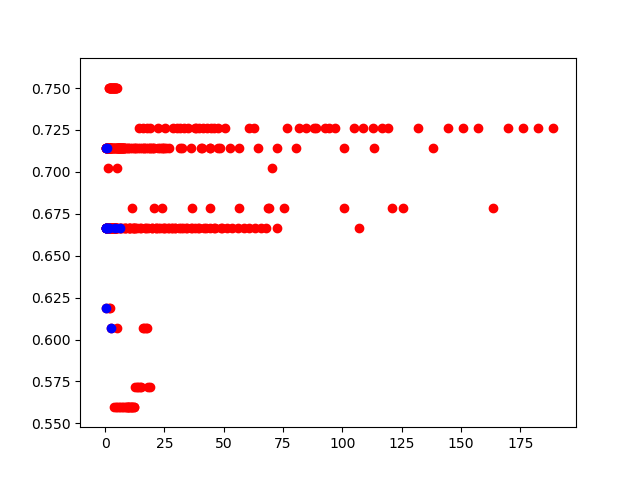

zurich


<IPython.core.display.Javascript object>


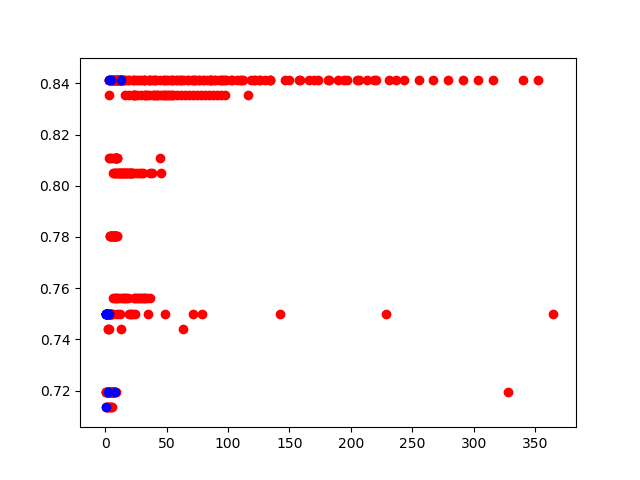

stuttgart


<IPython.core.display.Javascript object>


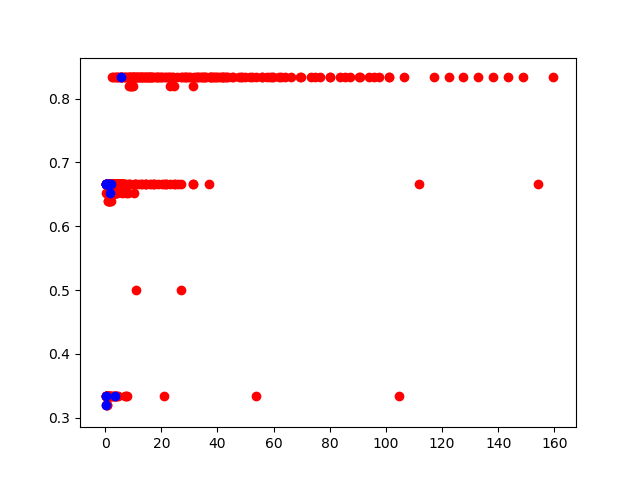

darmstadt


<IPython.core.display.Javascript object>


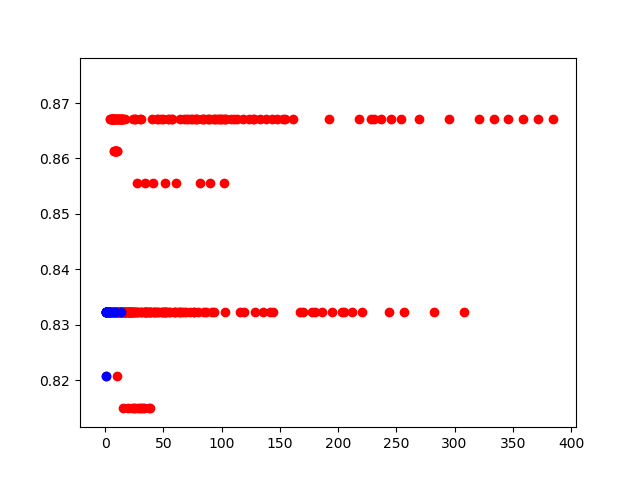

dusseldorf


<IPython.core.display.Javascript object>


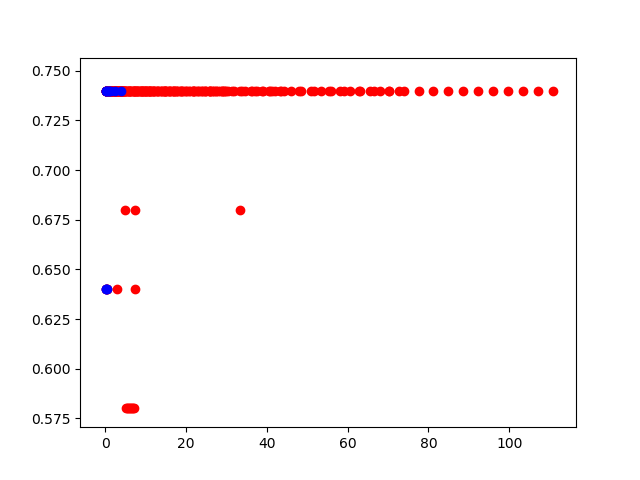

monchengladbach


<IPython.core.display.Javascript object>


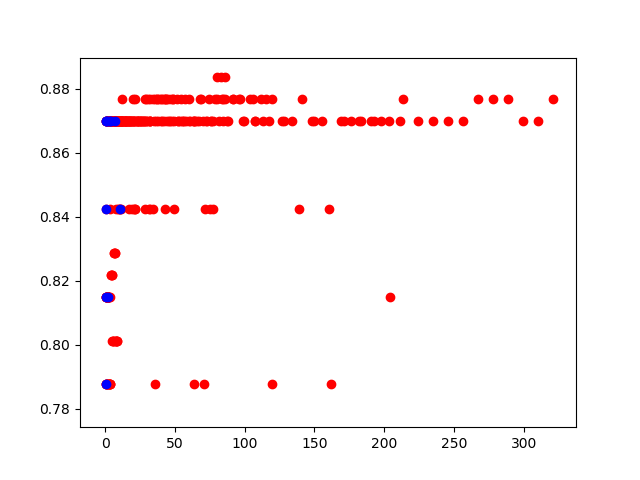

aachen


<IPython.core.display.Javascript object>


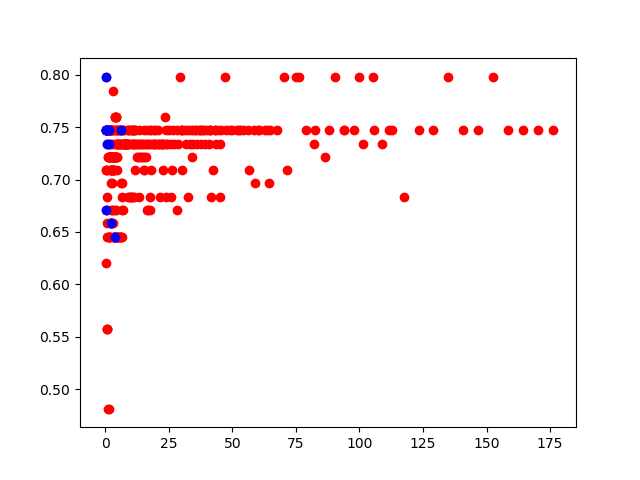

tubingen


<IPython.core.display.Javascript object>


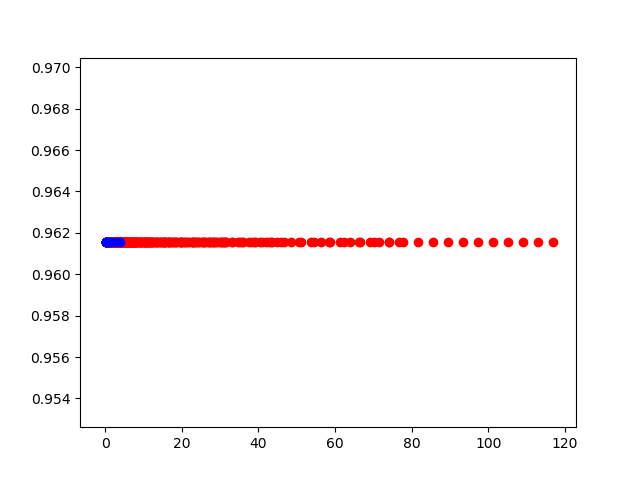

bochum


<IPython.core.display.Javascript object>


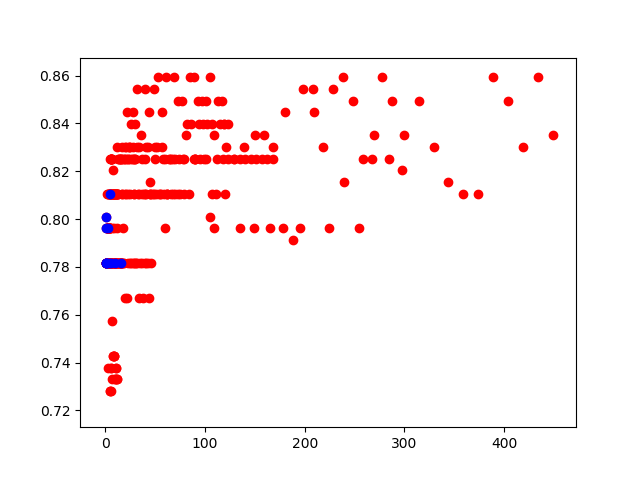

bremen


<IPython.core.display.Javascript object>


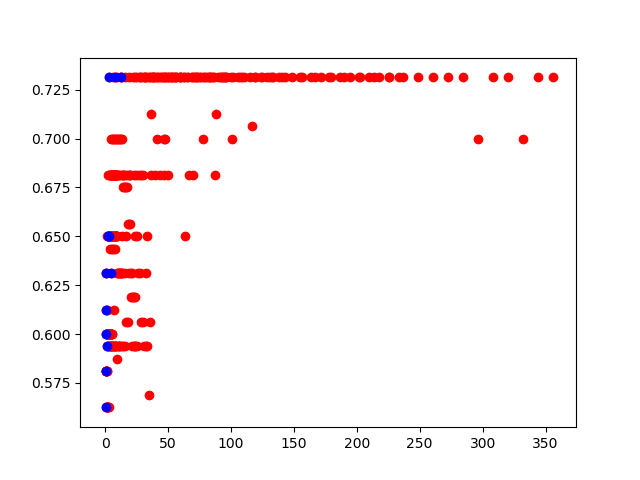

cologne


<IPython.core.display.Javascript object>


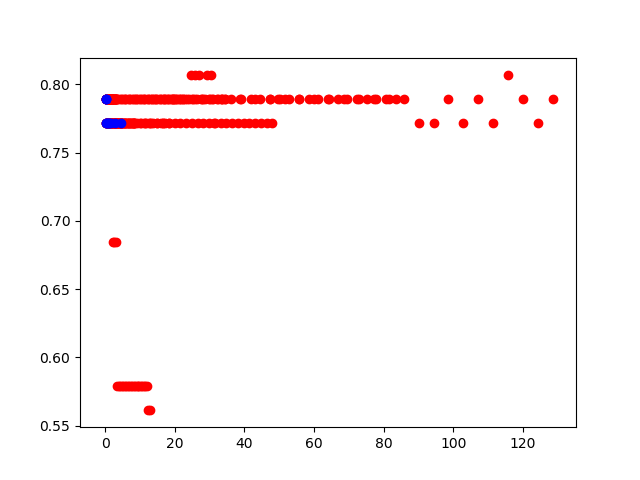

ulm


<IPython.core.display.Javascript object>


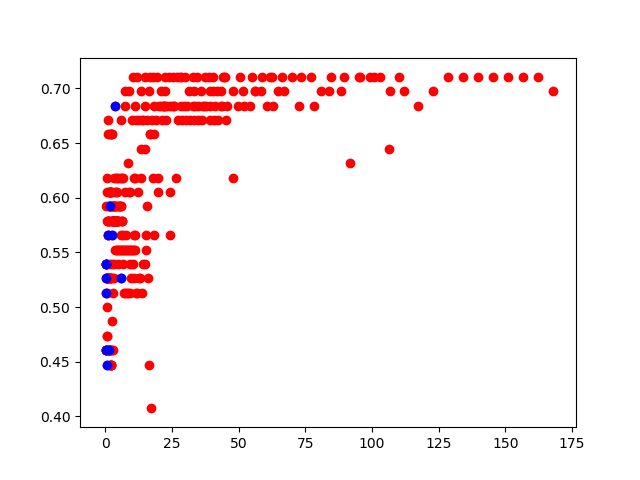

jena


In [32]:
# Generate profiles
TASK_ID = "1"
for city in city_names:
    plt.figure()
    for TASK_ID in [str(x) for x in range(1,10)]:
        print(city)
        city_path = os.path.join(results_root, city)

        profiles = []

        with open(os.path.join(city_path, 'hyp_map.json')) as f:
            hyp_map = json.load(f)
        profile_files = (glob.glob(city_path + "/*_profile.json"))
        hyperparam_ids = [os.path.basename(x).split('_profile.json')[0] for x in profile_files]

        plot_data_x_baselines = []
        plot_data_y_baselines = []

        for hp_id in hyperparam_ids:
            profile_path = os.path.join(city_path, '{}_profile.json'.format(hp_id))
            subprofile_path = os.path.join(city_path, '{}_subprofile_test.json'.format(hp_id))
            profile = get_profile(profile_path)[TASK_ID]
            epochs_to_subprofile = get_subprofile_epochids(subprofile_path) # [epoch ids where subprofiled]
            untrained_accs = get_subprofile_default_accs(subprofile_path) # {task_id: acc}

            # Get first epoch for baseline
            acc = profile.loc[0]['test_acc']
            cost = profile.loc[0]['total_cost']
            plot_data_x_baselines.append(cost)
            plot_data_y_baselines.append(acc)
            #plt.plot(profile['delta_acc_cost'], label=hp_id)
            plt.scatter(profile['total_cost'], profile['test_acc'], color='red')

        plt.scatter(plot_data_x_baselines, plot_data_y_baselines, color='blue')
        #plt.legend()
        
        
#     plt.scatter(plot_data_x_baselines, plot_data_y_baselines)
#     plt.title(city)
        
    #print(profiles)
    #     plt.title("Profiles: {}".format(city))
#     plt.ylabel("Accuracy")
#     plt.xlabel("Resource Time")
#     plt.gca().yaxis.grid(True)
#     plt.subplots_adjust(right=0.7)
#     plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2, title="Configurations")
    #plt.savefig(os.path.join(result_dir, '{}.png'.format(city)))

# Aggregate across tasks

<IPython.core.display.Javascript object>


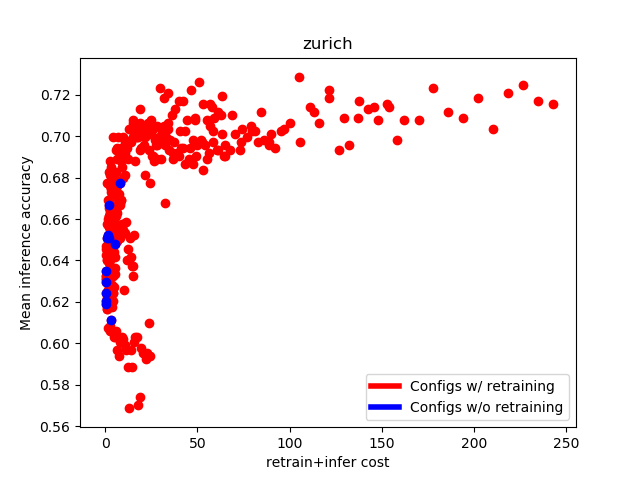

zurich


<IPython.core.display.Javascript object>


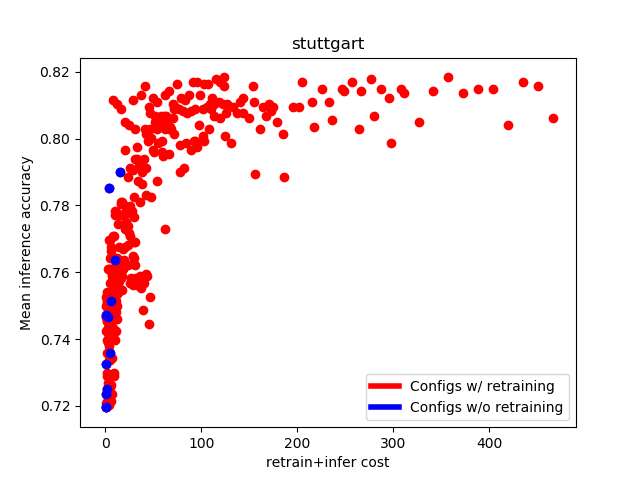

stuttgart


<IPython.core.display.Javascript object>


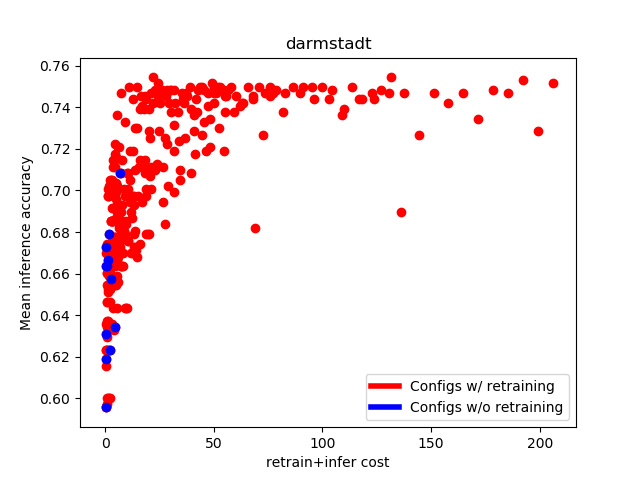

darmstadt


<IPython.core.display.Javascript object>


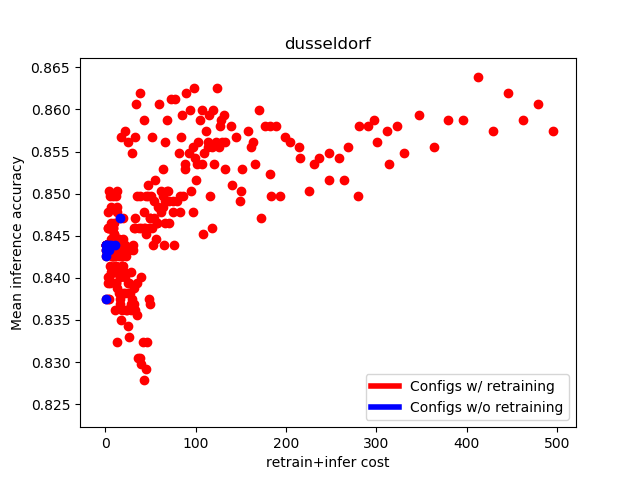

dusseldorf


<IPython.core.display.Javascript object>


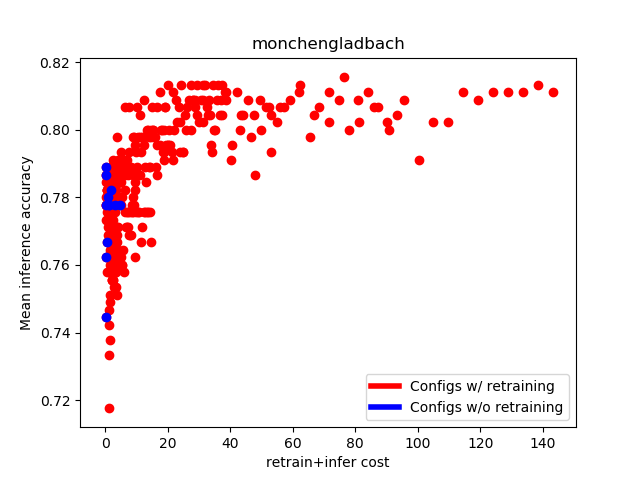

monchengladbach


<IPython.core.display.Javascript object>


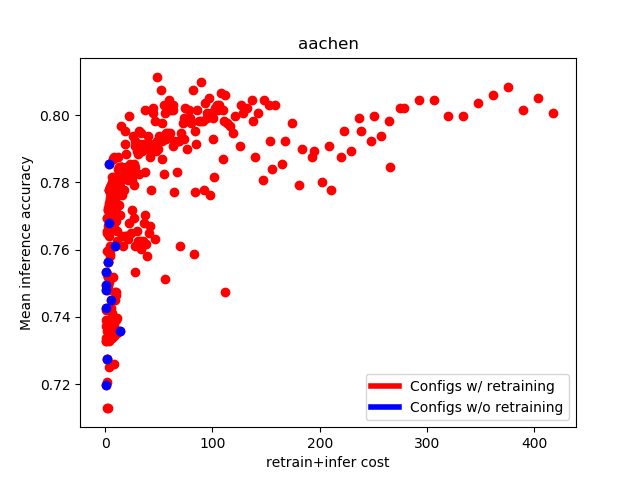

aachen


<IPython.core.display.Javascript object>


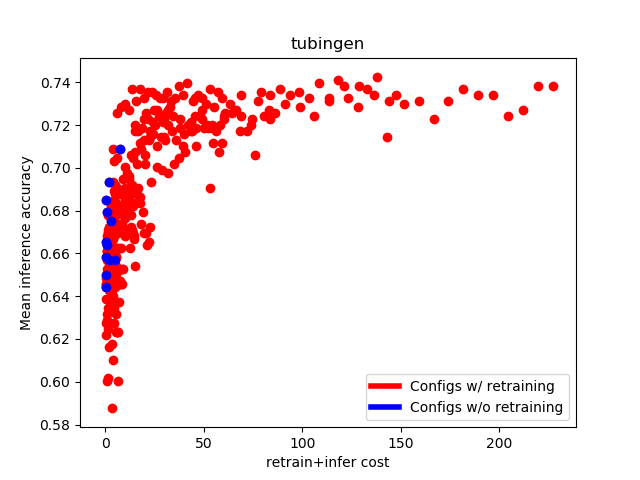

tubingen


<IPython.core.display.Javascript object>


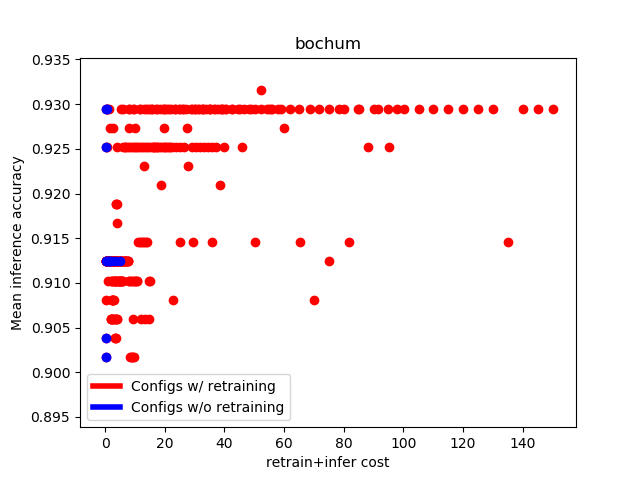

bochum


/home/romilb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


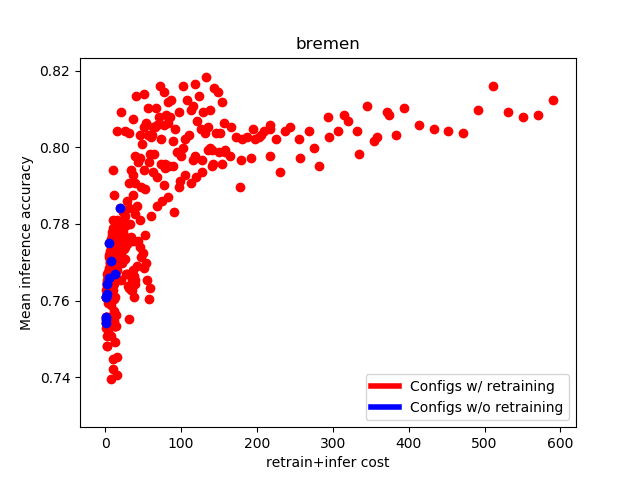

bremen


/home/romilb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


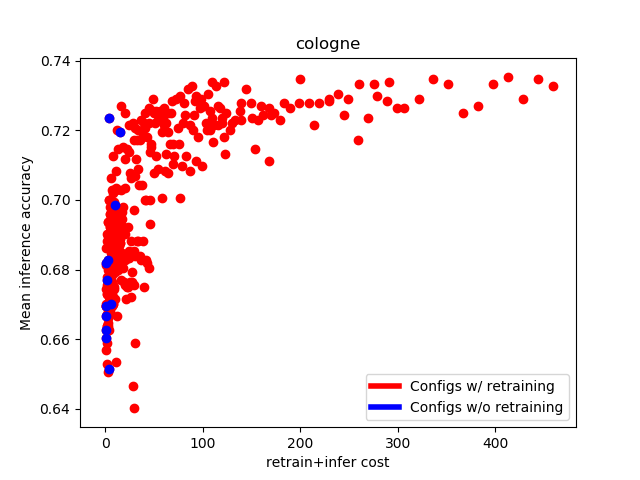

cologne


/home/romilb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


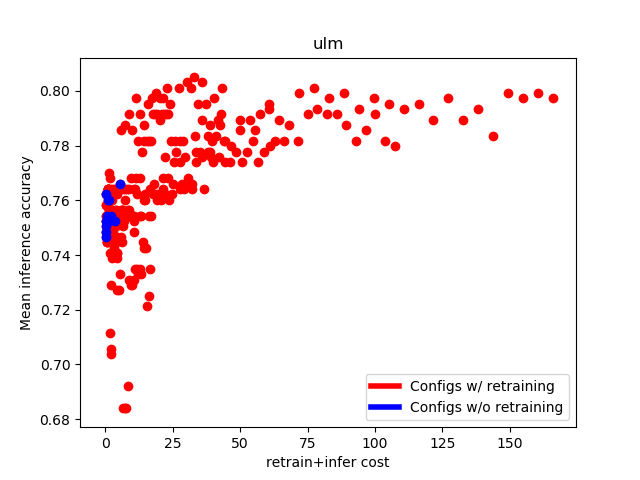

ulm


/home/romilb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


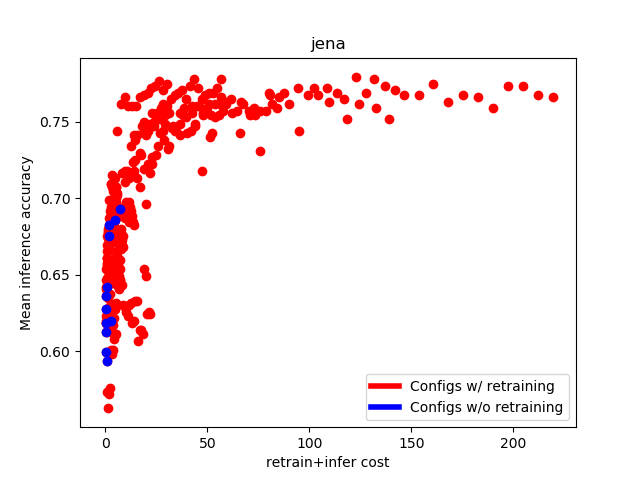

jena


In [65]:
# Generate profiles
from matplotlib.lines import Line2D
for city in city_names:
    plt.figure()
    print(city)
    city_path = os.path.join(results_root, city)

    with open(os.path.join(city_path, 'hyp_map.json')) as f:
        hyp_map = json.load(f)
    profile_files = (glob.glob(city_path + "/*_profile.json"))
    hyperparam_ids = [os.path.basename(x).split('_profile.json')[0] for x in profile_files]

    plot_data_x_baselines = []
    plot_data_y_baselines = []
    
    for hp_id in hyperparam_ids:
        all_task_profiles = []
        profile_path = os.path.join(city_path, '{}_profile.json'.format(hp_id))
        subprofile_path = os.path.join(city_path, '{}_subprofile_test.json'.format(hp_id))
        
        for TASK_ID in [str(x) for x in range(1,10)]:
            profile = get_profile(profile_path)[TASK_ID]
            all_task_profiles.append(profile)
            
        all_tasks_data = pd.concat(all_task_profiles)
        all_tasks_data_mean = all_tasks_data.groupby(level=0).mean()
        
        acc = all_tasks_data_mean.loc[0]['test_acc']
        cost = all_tasks_data_mean.loc[0]['total_cost']
        plot_data_x_baselines.append(cost)
        plot_data_y_baselines.append(acc)
        #plt.plot(profile['delta_acc_cost'], label=hp_id)
        plt.scatter(all_tasks_data_mean['total_cost'], all_tasks_data_mean['test_acc'], color='red')

    plt.scatter(plot_data_x_baselines, plot_data_y_baselines, color='blue', label='Configs without retraining')
    plt.xlabel('retrain+infer cost')
    plt.ylabel('Mean inference accuracy')
    plt.title(city)
    
    custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

    
    plt.legend(custom_lines, ['Configs w/ retraining', 'Configs w/o retraining'])    
    plt.savefig('{}.pdf'.format(city))
            # Get first epoch for baseline
#             acc = profile.loc[0]['test_acc']
#             cost = profile.loc[0]['total_cost']
#             plot_data_x_baselines.append(cost)
#             plot_data_y_baselines.append(acc)
#             #plt.plot(profile['delta_acc_cost'], label=hp_id)
#             plt.scatter(profile['total_cost'], profile['test_acc'], color='red')
        

In [42]:
x=pd.concat(all_profiles)

In [56]:
len(all_profiles)

9

In [53]:
foo = x.groupby(level=0).mean()

In [54]:
foo

,timestamp,train_time,train_loss,train_acc,train_num_batches,val_time,val_loss,val_acc,val_num_batches,test_time,test_loss,test_acc,test_num_batches,total_cost,delta_acc_cost
0,1.579385e+09,1.998668,1.070080,0.627359,650.222222,0.887521,1.015338,0.645218,512.555556,0.145990,1.010306,0.640432,84.0,2.144658,0.955352
1,1.579385e+09,2.003229,1.001796,0.650754,650.222222,0.890542,0.966366,0.662068,512.555556,0.146046,0.978923,0.657738,84.0,4.147942,0.581763
2,1.579385e+09,2.003279,0.954152,0.664597,650.222222,0.890760,0.938534,0.670342,512.555556,0.146310,0.964884,0.655423,84.0,6.151486,0.414442
3,1.579385e+09,2.003301,0.920752,0.674867,650.222222,0.890300,0.916370,0.677119,512.555556,0.146153,0.954479,0.660604,84.0,8.154630,0.324830
4,1.579385e+09,2.003882,0.893572,0.683774,650.222222,0.890469,0.895430,0.684202,512.555556,0.146222,0.948222,0.666777,84.0,10.158581,0.267961
5,1.579385e+09,2.004386,0.872553,0.688108,650.222222,0.891267,0.872781,0.691700,512.555556,0.145952,0.947246,0.661376,84.0,12.162697,0.222948
6,1.579385e+09,2.004524,0.850811,0.692164,650.222222,0.892166,0.854062,0.694769,512.555556,0.146088,0.943894,0.661706,84.0,14.167357,0.194453
7,1.579386e+09,2.004822,0.831397,0.698085,650.222222,0.891268,0.834598,0.699480,512.555556,0.146247,0.936204,0.663250,84.0,16.172339,0.172341
8,1.579386e+09,2.004621,0.812776,0.704472,650.222222,0.891383,0.817526,0.704388,512.555556,0.146362,0.927703,0.667108,84.0,18.177075,0.155944
9,1.579386e+09,2.004212,0.798109,0.709397,650.222222,0.890687,0.803530,0.707971,512.555556,0.146457,0.921923,0.668100,84.0,20.181382,0.142649
